<a href="https://colab.research.google.com/github/RomanKunal/Deep-Learning/blob/main/XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fitting 2 folds for each of 16 candidates, totalling 32 fits
Model saved as 'XGBoost_Model.joblib'
Best Parameters: {'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 500, 'subsample': 0.8}
R² Score: 84.67%
Test RMSE: 0.45


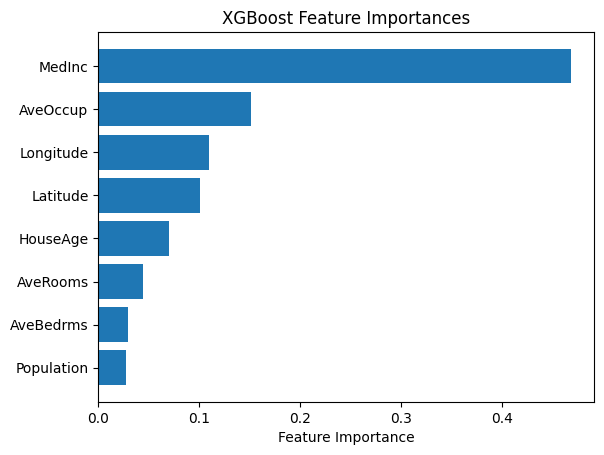

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import XGBRegressor
from sklearn.datasets import fetch_california_housing
import joblib
import matplotlib.pyplot as plt

# Load dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the XGBoost model
model = XGBRegressor(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [200, 500],
    'learning_rate': [0.05, 0.1],
    'max_depth': [4, 6],
    'min_child_weight': [1, 3],
    'subsample': [0.8]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='r2',
    cv=2,
    verbose=1,
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Save the best model
joblib.dump(best_model, 'XGBoost_Model.joblib')
print("Model saved as 'XGBoost_Model.joblib'")

# Evaluate the model
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Best Parameters:", grid_search.best_params_)
print(f"R² Score: {r2 * 100:.2f}%")
print(f"Test RMSE: {rmse:.2f}")

# Plot feature importances
feature_importance = best_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.barh(X_train.columns[sorted_idx], feature_importance[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importances")
plt.show()


In [2]:
#saving the model
import joblib
joblib.dump(model, 'XGBoost_Model.joblib')
print("Model saved as 'XGBoost_Model.joblib'")

Model saved as 'XGBoost_Model.joblib'


In [6]:
import joblib
import numpy as np

try:
    # Load the model
    loaded_model = joblib.load('XGBoost_Model.joblib')
    print("Model loaded successfully.")

    # Prepare test data (replace with realistic test values)
    test_features = np.array([1.5, 20, 6, 1, 800, 2.5, 37.5, -122.5]).reshape(1, -1)

    # Make a prediction
    prediction = loaded_model.predict(test_features)
    print("Prediction:", prediction)

except Exception as e:
    print(f"Error: {e}")


Model loaded successfully.
Prediction: [2.7620015]


In [4]:
print(type(loaded_model))

<class 'xgboost.sklearn.XGBRegressor'>
